In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['final_hepadata.csv']))


Saving final_hepadata.csv to final_hepadata.csv


In [ ]:
df = dataset.copy()
df = pd.DataFrame(df)
df.head()

,Month,Year,Total_TA,PA
0,1,2013,118,9
1,2,2013,110,3
2,3,2013,144,0
3,4,2013,112,1
4,5,2013,166,3


In [ ]:
gp = df.groupby(["Month"])["PA"].sum()
gp

Month
1     41
2     51
3     33
4     30
5     21
6     69
7     77
8     93
9     50
10    37
11    69
12    55
Name: PA, dtype: int64

In [ ]:
df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

In [ ]:
df.head()

,Month,Year,Total_TA,PA,mnth_sin,mnth_cos
0,1,2013,118,9,0.000000,1.000000e+00
1,2,2013,110,3,0.500000,8.660254e-01
2,3,2013,144,0,0.866025,5.000000e-01
3,4,2013,112,1,1.000000,6.123234e-17
4,5,2013,166,3,0.866025,-5.000000e-01


In [ ]:
df.corr(method = 'pearson')

,Month,Year,Total_TA,PA,mnth_sin,mnth_cos
Month,1.000000,0.000000e+00,0.290025,0.208276,-7.644607e-01,-2.048366e-01
Year,0.000000,1.000000e+00,0.581854,0.567759,2.220446e-17,-1.480297e-17
Total_TA,0.290025,5.818540e-01,1.000000,0.651199,-1.648947e-01,-2.313191e-01
PA,0.208276,5.677591e-01,0.651199,1.000000,-2.352978e-01,-2.100478e-01
mnth_sin,-0.764461,2.220446e-17,-0.164895,-0.235298,1.000000e+00,6.846375e-17
mnth_cos,-0.204837,-1.480297e-17,-0.231319,-0.210048,6.846375e-17,1.000000e+00


In [ ]:
X = df[['mnth_sin','mnth_cos','Total_TA']]
y = df[['PA']]

In [ ]:
X_train = df[['mnth_sin','mnth_cos','Total_TA']][:int(0.80*(len(X)))]
y_train = df[['PA']][:int(0.80*(len(y)))]
X_test = df[['mnth_sin','mnth_cos','Total_TA']][int(0.80*(len(X))):]
y_test = df[['PA']][int(0.80*(len(y))):]

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        mnth_sin      mnth_cos  Total_TA
0   0.000000e+00  1.000000e+00       118
1   5.000000e-01  8.660254e-01       110
2   8.660254e-01  5.000000e-01       144
3   1.000000e+00  6.123234e-17       112
4   8.660254e-01 -5.000000e-01       166
5   5.000000e-01 -8.660254e-01       165
6   1.224647e-16 -1.000000e+00       164
7  -5.000000e-01 -8.660254e-01       134
8  -8.660254e-01 -5.000000e-01       281
9  -1.000000e+00 -1.836970e-16       194
10 -8.660254e-01  5.000000e-01       147
11 -5.000000e-01  8.660254e-01       222
12  0.000000e+00  1.000000e+00       143
13  5.000000e-01  8.660254e-01       148
14  8.660254e-01  5.000000e-01       209
15  1.000000e+00  6.123234e-17       162
16  8.660254e-01 -5.000000e-01       142
17  5.000000e-01 -8.660254e-01       218
18  1.224647e-16 -1.000000e+00       178
19 -5.000000e-01 -8.660254e-01       209
20 -8.660254e-01 -5.000000e-01       320
21 -1.000000e+00 -1.836970e-16       155
22 -8.660254e-01  5.000000e-01       447
23 -5.000000e-01

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state=1)


<Figure size 1000x600 with 0 Axes>

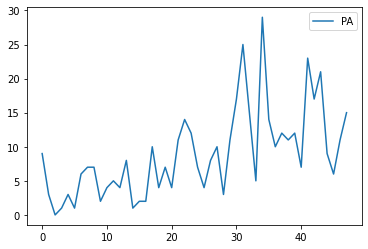

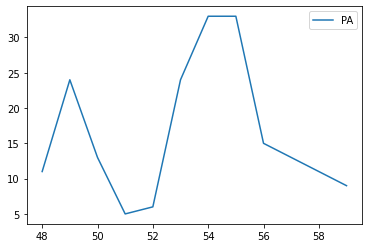

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
y_train.plot()
y_test.plot()

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train, y_train)
predict1 = model1.predict(X_test)
predict1 = np.reshape(predict1,(12,1))
predict1

array([[ 9.92872832],
       [12.47730328],
       [12.40717228],
       [10.30684921],
       [10.11284841],
       [25.3892978 ],
       [14.61886019],
       [18.61348837],
       [14.83902544],
       [10.87671961],
       [12.54941038],
       [14.38879746]])

In [ ]:
print("Linear Regression")
from sklearn import metrics
print("Accuracy:",metrics.explained_variance_score(y_test, predict1))
print("MAE: ", metrics.mean_absolute_error(y_test, predict1))
print("MSE: ", metrics.mean_squared_error(y_test, predict1))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predict1)))

Linear Regression
Accuracy: 0.34355794517433724
MAE:  5.498825479911981
MSE:  63.50766556395839
RMSE:  7.969169691000336


In [ ]:

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=30.0, epsilon=0.1))
regr.fit(X_train, y_train.values.ravel())
predict2 = regr.predict(X_test)
predict2 = np.reshape(predict2,(12,1))

In [ ]:
print("Support Vector Regression")
from sklearn import metrics
print("Accuracy:",metrics.explained_variance_score(y_test, predict2))
print("MAE: ", metrics.mean_absolute_error(y_test, predict2))
print("MSE: ", metrics.mean_squared_error(y_test, predict2))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predict2)))

Support Vector Regression
Accuracy: 0.43589418349837084
MAE:  6.585223372933181
MSE:  59.199070651978126
RMSE:  7.694093231302706


In [ ]:
pip install pmdarima 

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 16.2MB/s 
     |████████████████████████████████| 2.1MB 30.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['PA'])

(0.01, False)

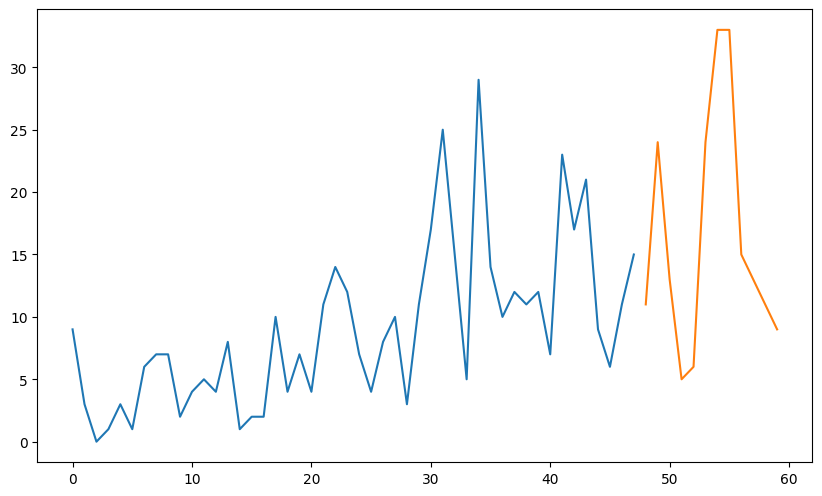

In [ ]:
pa = df['PA']
train = pa[:int(0.80*(len(pa)))]
valid = pa[int(0.80*(len(pa))):]

from matplotlib.pyplot import figure
figure(num=None, figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
train.plot()
valid.plot()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=317.570, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=311.947, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=315.587, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=312.353, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=312.953, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=313.239, Time=0.19 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=312.435, Time=0.14 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=317.987, Time=0.09 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=309.438, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=309.809, Time=0.06 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=310.228, Time=0.46 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=310.650, Time=0.31 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AI

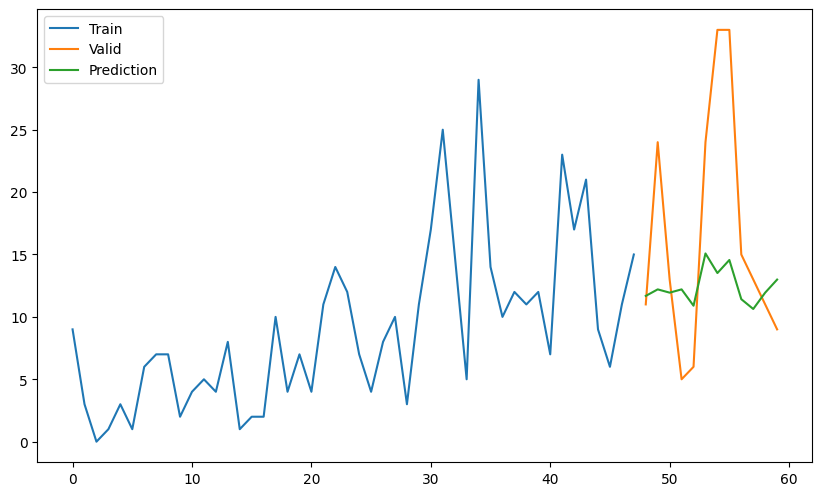

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, random_state=1)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

figure(num=None, figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print("Arima")
from sklearn import metrics
print("Accuracy:",metrics.explained_variance_score(valid, forecast))
print("MAE: ", metrics.mean_absolute_error(valid, forecast))
print("MSE: ", metrics.mean_squared_error(valid, forecast))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(valid, forecast)))

Arima
Accuracy: 0.17569887529445594
MAE:  6.946390099576235
MSE:  87.59093933675933
RMSE:  9.359003116612332


In [ ]:
predict3 = forecast
np.reshape(predict1,(12,1))
np.reshape(predict2,(12,1))

array([[12.184554  ],
       [12.6423532 ],
       [11.03281133],
       [10.74450395],
       [11.45648258],
       [11.69359562],
       [27.43469788],
       [20.12727035],
       [ 8.30507021],
       [ 5.11597348],
       [11.36619761],
       [16.62271443]])

In [ ]:
print(predict1)
print(predict2)
print(predict3)

[[ 9.92872832]
 [12.47730328]
 [12.40717228]
 [10.30684921]
 [10.11284841]
 [25.3892978 ]
 [14.61886019]
 [18.61348837]
 [14.83902544]
 [10.87671961]
 [12.54941038]
 [14.38879746]]
[[12.184554  ]
 [12.6423532 ]
 [11.03281133]
 [10.74450395]
 [11.45648258]
 [11.69359562]
 [27.43469788]
 [20.12727035]
 [ 8.30507021]
 [ 5.11597348]
 [11.36619761]
 [16.62271443]]
    Prediction
48   11.681304
49   12.204696
50   11.943000
51   12.204696
52   10.896215
53   15.083356
54   13.513178
55   14.559963
56   11.419607
57   10.634519
58   11.943000
59   12.989785


In [ ]:
print("Simple Average")
simple_avg = (predict1 + predict2 + predict3)/3
print("Simple Average prediction results are: \n",simple_avg)
from sklearn import metrics
print("Accuracy:",metrics.explained_variance_score(y_test, simple_avg))
print("MAE: ", metrics.mean_absolute_error(y_test, simple_avg))
print("MSE: ", metrics.mean_squared_error(y_test, simple_avg))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, simple_avg)))

Simple Average
Simple Average prediction results are: 
     Prediction
48   11.264862
49   12.441451
50   11.794328
51   11.085350
52   10.821849
53   17.388750
54   18.522245
55   17.766907
56   11.521234
57    8.875737
58   11.952869
59   14.667099
Accuracy: 0.40856390317792
MAE:  6.206781346408143
MSE:  61.90850085741251
RMSE:  7.868195527400963


In [ ]:
print("Weighted Average")
new_predict1 = 0.5938640289176961*predict1
new_predict2 = 0.6910911241861789*predict2
new_predict3 = 0.005816484003611233*predict3
#weighted_avg = (0.5938640289176961*predict1 + 0.6910911241861789*predict2 + 0.005816484003611233*predict3)
weighted_avg = (new_predict1 + new_predict2 + new_predict3)
print("weighted Average prediction results are: \n",weighted_avg)
from sklearn import metrics
print("Accuracy:",metrics.explained_variance_score(y_test, weighted_avg))
print("MAE: ", metrics.mean_absolute_error(y_test, weighted_avg))
print("MSE: ", metrics.mean_squared_error(y_test, weighted_avg))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, weighted_avg)))

Weighted Average
weighted Average prediction results are: 
     Prediction
48   14.384896
49   16.217828
50   15.062318
51   13.617287
52   13.986508
53   23.246863
54   27.720091
55   25.048347
56   14.618346
57   10.056752
58   15.377188
59   20.108355
Accuracy: 0.5738433200261088
MAE:  5.2190270398756615
MSE:  38.112661927216216
RMSE:  6.173545328837897


In [ ]:
# weighted_avg = (predict1 + predict2 + predict3)/3

# import random
# print("Weighted Average")
# while(np.sqrt(metrics.mean_squared_error(y_test, weighted_avg))>6.22):
#   a = random.random()
#   b = random.random()
#   c = random.random()
#   weighted_avg = (a*predict1 + b*predict2 + c*predict3)

#   if(np.sqrt(metrics.mean_squared_error(y_test, weighted_avg))<6.22):
#     print(a," ",b," ",c)
#     break
# print(weighted_avg)

